In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [2]:
# Run the 'ls' command and capture its output
command = "ls power32-singleSmall/*.csv"
output = subprocess.check_output(command, shell=True, text=True)

# Print the captured output
files = output.split()

In [3]:
Y1 = []
X1 = []
Energy1 = []
for file in files:
    df = pd.read_csv(file)
    Y1.append(df['power'].mean()/1000)
    time = np.array(df['time_stamp'])
    Energy1.append((df['power'].mean()/1000)*((time[-1] - time[0])/1000))
    t = file.find('/')
    X1.append(file[t+1:-4])

In [4]:
command = "ls power32-singleBig/*.csv"
output = subprocess.check_output(command, shell=True, text=True)

files = output.split()

In [5]:
Y2 = []
X2 = []
Energy2 = []
for file in files:
    df = pd.read_csv(file)
    Y2.append(df['power'].mean()/1000)
    time = np.array(df['time_stamp'])
    Energy2.append((df['power'].mean()/1000)*((time[-1] - time[0])/1000))
    t = file.find('/')
    X2.append(file[t+1:-4])

In [6]:
# Run the 'ls' command and capture its output
command = "ls power64-singleSmall/*.csv"
output = subprocess.check_output(command, shell=True, text=True)

# Print the captured output
files = output.split()

In [7]:
Y3 = []
X3 = []
Energy3 = []
for file in files:
    df = pd.read_csv(file)
    Y3.append(df['power'].mean()/1000)
    time = np.array(df['time_stamp'])
    Energy3.append((df['power'].mean()/1000)*((time[-1] - time[0])/1000))
    t = file.find('/')
    X3.append(file[t+1:-4])

In [8]:
# Run the 'ls' command and capture its output
command = "ls power64-singleBig/*.csv"
output = subprocess.check_output(command, shell=True, text=True)

# Print the captured output
files = output.split()

In [9]:
Y4 = []
X4 = []
Energy4 = []
for file in files:
    df = pd.read_csv(file)
    Y4.append(df['power'].mean()/1000)
    time = np.array(df['time_stamp'])
    Energy4.append((df['power'].mean()/1000)*((time[-1] - time[0])/1000))
    t = file.find('/')
    X4.append(file[t+1:-4])

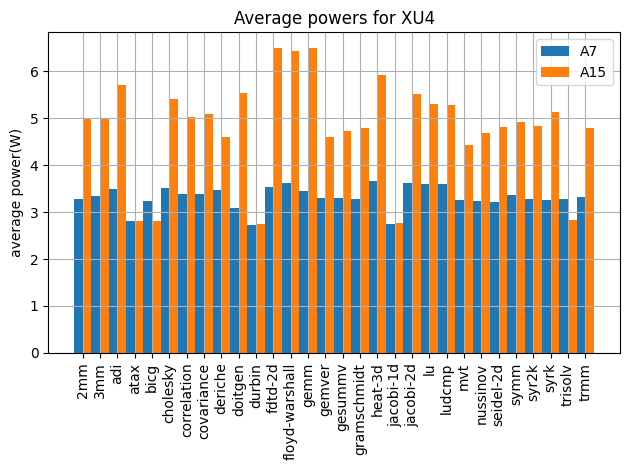

In [10]:
# Plotting small and big cores power averages
barWidth = 0.5
x = np.arange(len(X1))
plt.bar(x, Y1, width = barWidth, label = "A7")
plt.bar(x+barWidth, Y2, width = barWidth, label = "A15")
#plt.xlabel("program name")
plt.ylabel("average power(W)")
plt.xticks(x+barWidth/2, X1, rotation=90)
plt.grid()
plt.legend()
plt.title("Average powers for XU4")
plt.tight_layout()
plt.savefig("plot1.png")

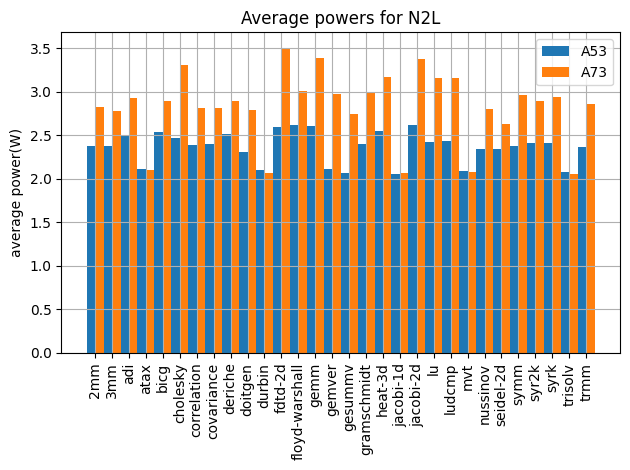

In [11]:
# Plotting small and big cores power averages
barWidth = 0.5
x = np.arange(len(X1))
plt.bar(x, Y3, width = barWidth, label = "A53")
plt.bar(x+barWidth, Y4, width = barWidth, label = "A73")
#plt.xlabel("program name")
plt.ylabel("average power(W)")
plt.xticks(x+barWidth/2, X1, rotation=90)
plt.grid()
plt.legend()
plt.title("Average powers for N2L")
plt.tight_layout()
plt.savefig("plot2.png")

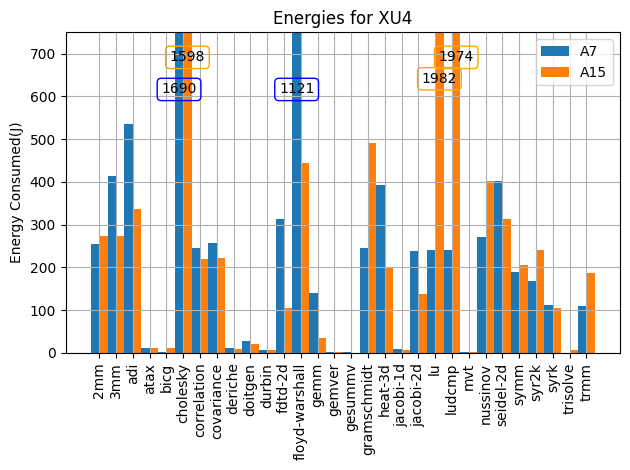

In [12]:
# # Plotting Energy for small and big cores
# barWidth = 0.5
# x = np.arange(len(X1))
# plt.bar(x, Energy1, width = barWidth, label = "A7")
# plt.bar(x+barWidth, Energy2, width = barWidth, label = "A15")
# #plt.xlabel("program name")
# plt.ylabel("Energy Consumed(J)")
# plt.ylim(0, 750)
# plt.xticks(x+barWidth/2, X1, rotation=90)
# plt.grid()
# plt.legend()
# plt.title("Energies for XU4")
# plt.tight_layout()
# plt.savefig("plot3.png")
# plt.show()



barWidth = 0.5
x = np.arange(len(X1))

# Plotting the bar graph
plt.bar(x, Energy1, width=barWidth, label="A7")
plt.bar(x + barWidth, Energy2, width=barWidth, label="A15")

# Set y-axis limit
plt.ylim(0, 750)

t2 = 625
t1 = 650
# Annotate bars that exceed the y-axis limit
for i, (e3, e4) in enumerate(zip(Energy1, Energy2)):
    if e3 > plt.ylim()[1]:        
        plt.text(i, 600, f'{e3:.0f}', ha='center', va='bottom', color='black', fontsize=10,
                 bbox=dict(boxstyle='round', edgecolor='blue', facecolor='none', linewidth=1))

    if e4 > plt.ylim()[1]:
        if(t2==625):
            t2=675
        else:
            t2=625
        plt.text(i + barWidth, t2, f'{e4:.0f}', ha='center', va='bottom', color='black', fontsize=10,
                 bbox=dict(boxstyle='round', edgecolor='orange', facecolor='none', linewidth=1))

plt.ylabel("Energy Consumed(J)")
plt.xticks(x + barWidth / 2, X3, rotation=90)
plt.grid()
plt.legend()
plt.title("Energies for XU4")
plt.tight_layout()
plt.savefig("plot3.png")
plt.show()

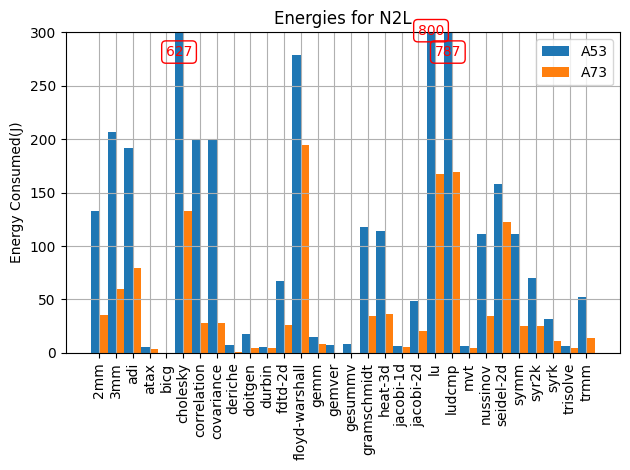

In [13]:
# # Plotting Energy for small and big cores
# barWidth = 0.5
# x = np.arange(len(X3))
# plt.bar(x, Energy3, width = barWidth, label = "A53")
# plt.bar(x+barWidth, Energy4, width = barWidth, label = "A73")
# #plt.xlabel("program name")
# plt.ylabel("Energy Consumed(J)")
# plt.xticks(x+barWidth/2, X3, rotation=90)
# plt.ylim(0, 250)
# plt.grid()
# plt.legend()
# plt.title("Energies for N2L")
# plt.tight_layout()
# plt.savefig("plot4.png")
# plt.show()




barWidth = 0.5
x = np.arange(len(X3))

# Plotting the bar graph
plt.bar(x, Energy3, width=barWidth, label="A53")
plt.bar(x + barWidth, Energy4, width=barWidth, label="A73")

# Set y-axis limit
plt.ylim(0, 300)

# Annotate bars that exceed the y-axis limit
for i, (e3, e4) in enumerate(zip(Energy3, Energy4)):
    t = 275
    if e3 > plt.ylim()[1]:
        if(i%4):
            t=275
        else:
            t=295
        plt.text(i, t, f'{e3:.0f}', ha='center', va='bottom', color='red', fontsize=10,
                 bbox=dict(boxstyle='round', edgecolor='red', facecolor='none', linewidth=1))

    if e4 > plt.ylim()[1]:
        plt.text(i + barWidth, t, f'{e4:.0f}', ha='center', va='bottom', color='red', fontsize=10,
                 bbox=dict(boxstyle='round', edgecolor='red', facecolor='none', linewidth=1))

plt.ylabel("Energy Consumed(J)")
plt.xticks(x + barWidth / 2, X3, rotation=90)
plt.grid()
plt.legend()
plt.title("Energies for N2L")
plt.tight_layout()
plt.savefig("plot4.png")
plt.show()

In [14]:
# # Plotting shift ratios between small and big cores
# pY = []
# eY = []
# for i in range(30):
#     pY.append(Y2[i]/Y1[i])
#     eY.append(Energy2[i]/Energy1[i])
# barWidth = 0.5
# plt.bar(x, pY, width = barWidth, label = "power ratios")
# plt.bar(x+barWidth, eY, width = barWidth, label = "Energy ratios")
# plt.grid()
# plt.title("Ratios of powers between small and big cores of XU6")
# plt.xticks(x+barWidth/2, X1, rotation=90)
# plt.legend()
# plt.tight_layout()
# plt.savefig("plot3.png")
# plt.show()

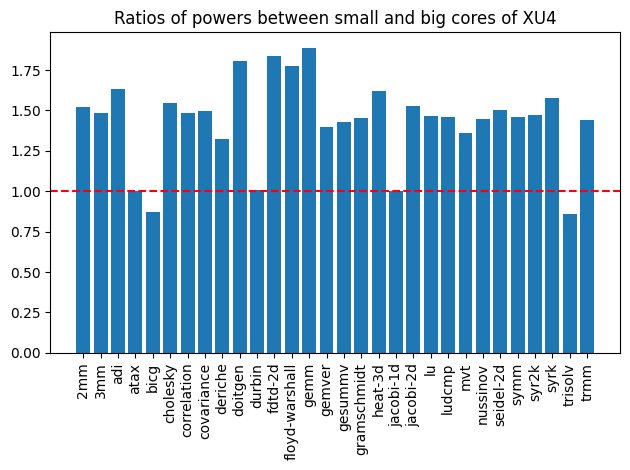

In [15]:
pY = []
for i in range(30):
    pY.append(Y2[i]/Y1[i])
plt.bar(X1, pY)
plt.axhline(y=1, linestyle='--', color='red')
plt.grid()
plt.xticks(rotation=90)
plt.grid()
plt.title("Ratios of powers between small and big cores of XU4")
plt.tight_layout()
plt.savefig("plot5.png")
plt.show()

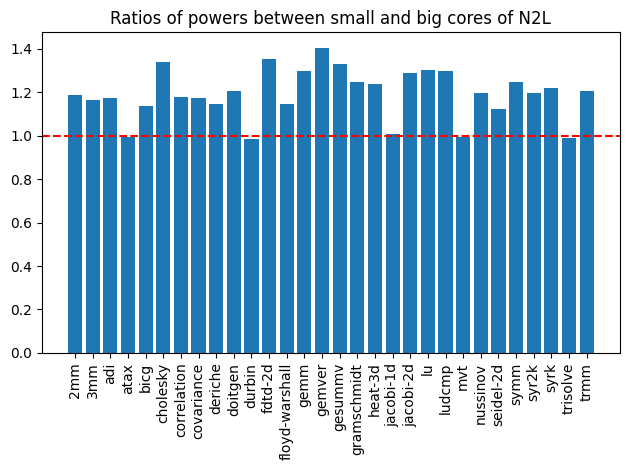

In [16]:
pY = []
for i in range(30):
    pY.append(Y4[i]/Y3[i])
plt.bar(X3, pY)
plt.axhline(y=1, linestyle='--', color='red')
plt.grid()
plt.xticks(rotation=90)
plt.grid()
plt.title("Ratios of powers between small and big cores of N2L")
plt.tight_layout()
plt.savefig("plot6.png")
plt.show()

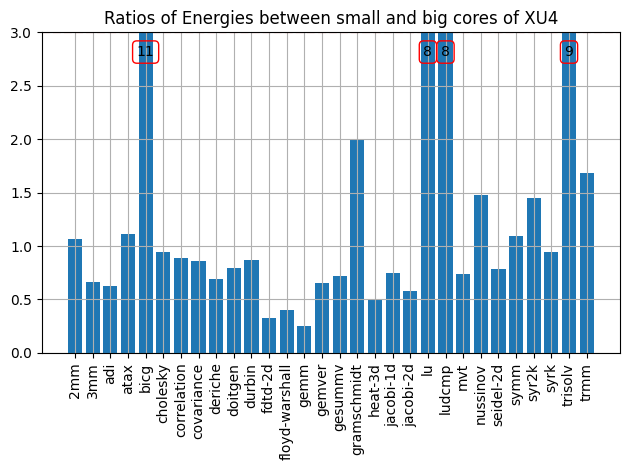

In [17]:
eY = []
for i in range(30):
    eY.append(Energy2[i]/Energy1[i])
# plt.bar(X1, eY)
# plt.xticks(rotation=90)
# plt.ylim(0, 3)
# plt.axhline(y=1, linestyle='--', color='red')
# plt.grid()
# plt.title("Ratios of Energies between small and big cores of XU4")
# plt.legend()
# plt.tight_layout()
# plt.savefig("plot7.png")
# plt.show()
# Plotting the bar graph with adjusted bar width and positions
fig, ax = plt.subplots()

# Adjust the width of each bar
bar_width = 0.8

# Compute the positions of the bars with additional space
bar_positions = np.arange(len(X1)) * (bar_width + 0.2)

# Plot the bars
bars = plt.bar(bar_positions, eY, width=bar_width)

# Set the y-limit to accommodate the annotation
plt.ylim(0, 3)

# Add a horizontal line at the y-axis limit
plt.axhline(y=3, linestyle='--', color='red')

# Annotate bars with their y-values if they exceed the y-axis limit
for bar in bars:
    yval = bar.get_height()
    if yval > 3:
        plt.text(bar.get_x() + bar.get_width()/2, 2.75, f'{yval:.0f}', ha='center', va='bottom',color='black', fontsize=10,
                 bbox=dict(boxstyle='round', edgecolor='red', facecolor='none', linewidth=1))

# Customize the plot
plt.xticks(bar_positions, X1, rotation=90)
plt.grid()
plt.title("Ratios of Energies between small and big cores of XU4")
plt.tight_layout()

# Save the plot to a file and display
plt.savefig("plot7.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


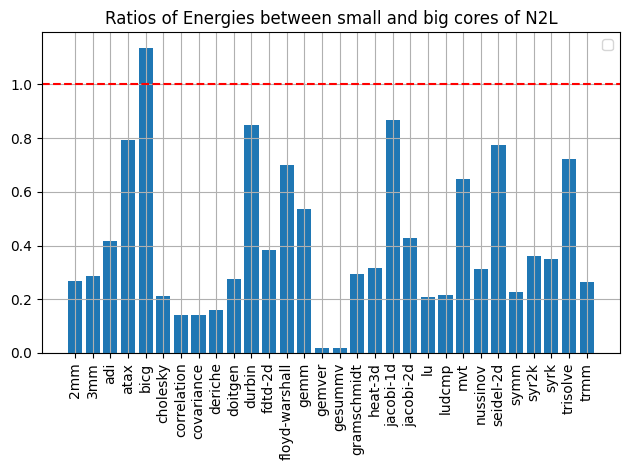

In [18]:
eY = []
for i in range(30):
    eY.append(Energy4[i]/Energy3[i])
plt.bar(X3, eY)
plt.xticks(rotation=90)
plt.axhline(y=1, linestyle='--', color='red')
plt.grid()
plt.title("Ratios of Energies between small and big cores of N2L")
plt.legend()
plt.tight_layout()
plt.savefig("plot8.png")
plt.show()